In [2]:
import os
import pandas as pd
os.listdir('.')

['.git',
 'abalone.data',
 'friend.csv',
 'new_friend.csv',
 'numpy_Practice1.ipynb',
 'pandas_Practice1.ipynb']

In [3]:
# 데이터 폴더 src 변수 할당
base_src = 'D:/공부/python'

# friend.csv 파일 src 변수 할당
friend_src = base_src + '/friend.csv'

In [4]:
# pandas의 read_csv -> 데이터 불러오기
df = pd.read_csv(friend_src, encoding='utf-8')

In [5]:
# head() 데이터를 읽어보기 => 5개만 읽기 -> 괄호 안에 숫자 지정하면 여러 개 읽을 수 있음
df.head()

,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager


In [6]:
new_friend_src = base_src + "/new_friend.csv"

In [7]:
new_friend_src

'D:/공부/python/new_friend.csv'

In [8]:
# index=False 꼭 하기(필요없는 데이터는 안가져오게 하려고)
df.to_csv(new_friend_src,index=False,encoding='utf-8')

In [9]:
os.listdir(base_src)

['.git',
 'abalone.data',
 'friend.csv',
 'new_friend.csv',
 'numpy_Practice1.ipynb',
 'pandas_Practice1.ipynb']

In [10]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [11]:
# Series 실습
import numpy as np
np.array([1, 2, 3])

array([1, 2, 3])

In [12]:
# 데이터프레임(집합) => 시리즈(단일) => 데이터프레임
series = df['name']
series

0     John
1    Jenny
2     Nate
3    Julia
4    Brian
5    Chris
Name: name, dtype: object

In [13]:
# pd.Series 함수를 통해서 만드는 것도 가능
series = pd.Series([1, 2, 3, 4])
series

0    1
1    2
2    3
3    4
dtype: int64

In [14]:
# pd.Series의 옵션이 무엇이 있는지 확인
# index => 할당값의 지정 이름, 중복 가능['a','a', 'b', 'c']
# dtype => 대표적 : int, float, string, boolean 등
series = pd.Series([1, 2, 3, 4], index=['a','b', 'c', 'd'], dtype=float)
series

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64

In [15]:
series = pd.Series([10, 2, 5, 4], index=['a','b','c','d'], dtype=float)
series.sort_values(ascending=True) # 오름차순(기본값)

b     2.0
d     4.0
c     5.0
a    10.0
dtype: float64

In [16]:
series.sort_values(ascending=False) # 내림차순

a    10.0
c     5.0
d     4.0
b     2.0
dtype: float64

In [17]:
# DataFrame 실습
df = pd.DataFrame({'a':[2,3], 'b':[5, 10]})
df

,a,b
0,2,5
1,3,10


In [18]:
df = pd.DataFrame([[2, 5], [3, 10], [10, 20]], columns=['a', 'b'])
df

,a,b
0,2,5
1,3,10
2,10,20


In [19]:
# - DataFrame 행, 열 선택 및 필터링
df = pd.read_csv(friend_src, encoding='utf-8')
df.head()

,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager


In [20]:
# index 2번에 해당하는 row 가져오기
# 시리즈 형태
df.iloc[4]

name      Brian
age          45
job     manager
Name: 4, dtype: object

In [21]:
# 데이터프레임 형태로 가져오기
df.iloc[[2]]

,name,age,job
2,Nate,30,teacher


In [22]:
# 컬럼만 보고싶은 경우
df['job']

0      student
1    developer
2      teacher
3      dentist
4      manager
5       intern
Name: job, dtype: object

In [23]:
df.loc[:,'job']

0      student
1    developer
2      teacher
3      dentist
4      manager
5       intern
Name: job, dtype: object

In [24]:
df.iloc[:, 2]

0      student
1    developer
2      teacher
3      dentist
4      manager
5       intern
Name: job, dtype: object

In [25]:
df.index = [0, 1, 2,3,4,5]

In [26]:
df

,name,age,job
0,John,20,student
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager
5,Chris,25,intern


In [27]:
df.iloc[2]

name       Nate
age          30
job     teacher
Name: 2, dtype: object

In [28]:
df.loc[2]

name       Nate
age          30
job     teacher
Name: 2, dtype: object

In [29]:
import numpy as np

In [30]:
# 조건 필터링 가져오기
# 30대 이상만 가져오기
# boolean 형태로 가져옴
df['age']>=30

0    False
1     True
2     True
3     True
4     True
5    False
Name: age, dtype: bool

In [31]:
df[df['age']>=30]

,name,age,job
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist
4,Brian,45,manager


In [32]:
# job이 intern인 사람 가져오기
df['job'] == 'intern'

0    False
1    False
2    False
3    False
4    False
5     True
Name: job, dtype: bool

In [33]:
df[df['job'] == 'intern']

,name,age,job
5,Chris,25,intern


In [34]:
# 조건 여러개
# 30대 이상 40대 이하
df[df['age'] >=30 & df['age'] <= 40]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df[(df['age'] >=30) & (df['age'] <= 40)]

,name,age,job
1,Jenny,30,developer
2,Nate,30,teacher
3,Julia,40,dentist


In [ ]:
# 조건 여러개
# 30대 미만 혹은 40대 초과
df[(df['age']<30) | (df['age']>40)]

,name,age,job
0,John,20,student
4,Brian,45,manager
5,Chris,25,intern


In [ ]:
df['job'].apply(lambda x : x in ['student', 'manager'])

0     True
1    False
2    False
3    False
4     True
5    False
Name: job, dtype: bool

In [ ]:
# in을 통한 포함 조건 걸기
df[df['job'].apply(lambda x : x in ['student', 'manager'])]

,name,age,job
0,John,20,student
4,Brian,45,manager


In [ ]:
os.listdir(base_src)

['.git',
 'abalone.data',
 'friend.csv',
 'new_friend.csv',
 'numpy_Practice1.ipynb',
 'pandas_Practice1.ipynb']

In [ ]:
abalone_src = base_src + '/abalone.data'

In [ ]:
abalone_df = pd.read_csv(abalone_src, header=None, sep=',',names=['sex','length','diameter','height', 
                  'whole_weight','shucked_weight','viscera_weight', 
                  'shell_weight','rings'])
abalone_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
# 데이터 shape를 확인
abalone_df.shape

(4177, 9)

In [ ]:
# 데이터 결측값 확인
abalone_df.isnull()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [ ]:
abalone_df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [ ]:
abalone_df.isnull().sum().sum()

0

In [ ]:
# 기술통계 확인 => 연속형 변수만 확인 가능 => numerical 변수만 확인 가능
abalone_df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# 전복(abalone) 성별에 따라 groupby함수를 통해 집계하기
#         DataFrame[집계 변수].groupby(DataFrame[집계 대상])
# 성별을 대상으로 whole_weight를 집계하기
grouped = abalone_df['whole_weight'].groupby(abalone_df['sex'])

In [ ]:
# 합계
grouped.sum()

sex
F    1367.8175
I     578.8885
M    1514.9500
Name: whole_weight, dtype: float64

In [ ]:
grouped.mean()

sex
F    1.046532
I    0.431363
M    0.991459
Name: whole_weight, dtype: float64

In [ ]:
# 개수
grouped.size()

sex
F    1307
I    1342
M    1528
Name: whole_weight, dtype: int64

In [ ]:
# 그룹변수가 하나가 아닌, 전체 연속형 변수에 대한 집계
abalone_df.groupby(abalone_df['sex']).mean()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


In [ ]:
# 다음과 같이 간단하게 표현
abalone_df.groupby('sex').mean()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


In [ ]:
# 새로운 조건에 맞는 변수 추가
abalone_df['length_bool'] = np.where(abalone_df['length']>abalone_df['length'].median(), 
                                     'length_long', # True일 경우
                                     'length_short') # False일 경우

In [ ]:
abalone_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_bool
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,length_long
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long


In [ ]:
# 그룹변수를 2개 이상 선택해서 총계 처리?
abalone_df.groupby(['sex', 'length_bool']).mean()

length  diameter    height  whole_weight  shucked_weight  \
sex length_bool                                                                
F   length_long   0.626895  0.493020  0.169944      1.261330        0.542957   
    length_short  0.477428  0.373301  0.132632      0.589702        0.240380   
I   length_long   0.584495  0.452952  0.150957      0.923215        0.402524   
    length_short  0.402210  0.305893  0.100997      0.351234        0.156581   
M   length_long   0.623359  0.489291  0.168670      1.255182        0.554312   
    length_short  0.454875  0.353336  0.121664      0.538157        0.224335   

                  viscera_weight  shell_weight      rings  
sex length_bool                                            
F   length_long         0.276945      0.360013  11.415073  
    length_short        0.132311      0.178650  10.521531  
I   length_long         0.196912      0.273247  10.585106  
    length_short        0.074920      0.104549   7.451473  
M   length_long         0.272203      0.351683  11.299172  
    length_short        0.118156      0.162141   9.685053

In [ ]:
# 간결하게 표현 가능
abalone_df.groupby(['sex', 'length_bool'])['whole_weight'].mean()

sex  length_bool 
F    length_long     1.261330
     length_short    0.589702
I    length_long     0.923215
     length_short    0.351234
M    length_long     1.255182
     length_short    0.538157
Name: whole_weight, dtype: float64

In [ ]:
# 중복 데이터 삭제
# 중복된 row를 확인하는 법
abalone_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Length: 4177, dtype: bool

In [ ]:
abalone_df.duplicated().sum()

0

In [ ]:
# 중복 예제 생성을 위해서 가상으로 중복데이터 생성

new_abalone = abalone_df.iloc[[0]]
new_abalone_df = pd.concat([abalone_df, new_abalone], axis=0)
new_abalone_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_bool
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short
...,...,...,...,...,...,...,...,...,...,...
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12,length_long


In [ ]:
new_abalone_df.duplicated().sum()

0

In [ ]:
new_abalone_df.duplicated(keep='last')

0       False
1       False
2       False
3       False
4       False
        ...  
4172    False
4173    False
4174    False
4175    False
4176    False
Length: 4177, dtype: bool

In [ ]:
# 중복 데이터(row 삭제)
new_abalone_df = new_abalone_df.drop_duplicates()

In [ ]:
new_abalone_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_bool
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,length_long
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long


In [ ]:
# NaN(결측치)를 찾아서 다른 값으로 변경
# 기존 데이터에는 결측치가 존재 x
abalone_df.isnull().sum().sum()

0

In [ ]:
nan_abalone_df = abalone_df.copy()

In [ ]:
nan_abalone_df.loc[2, 'length'] = np.nan

In [ ]:
nan_abalone_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_bool
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short
2,F,NaN,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,length_long
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long


In [ ]:
# 결측치를 특정 값으로 채우기
zero_abalone_df = nan_abalone_df.fillna(0)
zero_abalone_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_bool
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short
2,F,0.000,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,length_long
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long


In [ ]:
# 결측치를 결측치가 속한 컬럼의 평균값으로 대체하기
nan_abalone_df.mean()

C:\Users\jwjle\AppData\Local\Temp\ipykernel_18348\3403304850.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  nan_abalone_df.mean()


length            0.523991
diameter          0.407881
height            0.139516
whole_weight      0.828742
shucked_weight    0.359367
viscera_weight    0.180594
shell_weight      0.238831
rings             9.933684
dtype: float64

In [ ]:
nan_abalone_df.fillna(nan_abalone_df.mean())

C:\Users\jwjle\AppData\Local\Temp\ipykernel_18348\3553259207.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  nan_abalone_df.fillna(nan_abalone_df.mean())


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_bool
0,M,0.455000,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short
1,M,0.350000,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short
2,F,0.523991,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short
3,M,0.440000,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short
4,I,0.330000,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565000,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,length_long
4173,M,0.590000,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long
4174,M,0.600000,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long
4175,F,0.625000,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long


In [ ]:
# apply 함수
# 열 기준 집계
abalone_df[['diameter']].apply(np.average, axis=0)

diameter    0.407881
dtype: float64

In [ ]:
# 행 기준 집계
abalone_df[['diameter']].apply(np.average, axis=1)

0       0.365
1       0.265
2       0.420
3       0.365
4       0.255
        ...  
4172    0.450
4173    0.440
4174    0.475
4175    0.485
4176    0.555
Length: 4177, dtype: float64

In [ ]:
# 사용자 함수를 통한 집계 ★★★★★
import math

def avg_ceil(x, y, z):
    return math.ceil((x+y+z)/3) # ceil 올림

abalone_df[['diameter', 'height', 'whole_weight']].apply(lambda x: avg_ceil(x[0], x[1], x[2]), axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
4172    1
4173    1
4174    1
4175    1
4176    1
Length: 4177, dtype: int64

In [ ]:
# 문제
# 1. 사용자 정의 함수 사용
# 2. ['diameter', 'height', 'whole_weight'] 변수 사용
# 3. 세 변수의 합이 1이 넘으면 True, 아니면 False 출력 후 answer 변수에 저장
# 4. abalone_df에 answer 열을 추가하고 입력

def f(x):
    sum_ = x[0] + x[1] + x[2]
    
    if sum_ > 1:
        return True
    else:
        return False
    
answer = abalone_df[['diameter', 'height', 'whole_weight']].apply(lambda x: f(x), axis=1)
abalone_df['answer'] = answer

In [ ]:
abalone_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_bool,answer
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short,False
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short,False
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short,True
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short,True
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,length_long,True
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long,True
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long,True
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long,True


In [ ]:
# 컬럼 내 유니크한 값 뽑아서 갯수 확인(카테고리 변수)
abalone_df['sex'].value_counts(dropna=True)

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [ ]:
# 두 개의 DataFrame 합치기
# 가상 abalone 1개 row 데이터 생성 및 결합
one_abalone_df = abalone_df.iloc[[0]]
pd.concat([abalone_df, one_abalone_df], axis=0)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_bool,answer
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short,False
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short,False
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short,True
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short,True
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short,False
...,...,...,...,...,...,...,...,...,...,...,...
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long,True
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long,True
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long,True
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12,length_long,True


In [ ]:
# 전체 행의 성별에 대해
one_abalone_df = abalone_df.iloc[:, [0]]
pd.concat([abalone_df, one_abalone_df], axis=1)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_bool,answer,sex
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short,False,M
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short,False,M
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short,True,F
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short,True,M
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short,False,I
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,length_long,True,F
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long,True,M
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long,True,M
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long,True,F


In [58]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings   # 시각화 관련 버전 등의 경고(없애기위함) 

# 시각화 하기 전 준비 (안해도 되는 과정) 
plt.rcParams['figure.figsize'] = [10, 8] # 시각화 보여줄 때의 화면 크기 
sns.set(style ='whitegrid') # 시각화 그려주는 테마 중 하나 
sns.set_palette('pastel') # 시각화 색깔 

warnings.filterwarnings('ignore') # 경고 무시 


In [49]:
# % 한글이 깨지는 경우 
from matplotlib import font_manager, rc 
import matplotlib
import platform 

if platform .system() == 'Windows':
  # 원도우인 경우 
  font_name =font_manager.FontProperties(fname ='c:/Windows/Fonts/malgun.ttf').get_name()
  rc('font', family = font_name) 
else: 
  # MAC인 경우 
  rc('font', family= 'AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False 

In [50]:
# Loading'Tips' dataset from seaborn 
tips = sns.load_dataset('tips') 
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
tips.shape 

(244, 7)

In [53]:
# matplotlib를 활용한 시각화 
# 어느 요일에 팁을 많이 받는지 
sum_tip_by_day = tips.groupby('day')['tip'].sum() 
sum_tip_by_day 

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [55]:
x_label = ['Thu', 'Fri','sat', 'sun'] # X_label이 목,금,토,일이 있음 
x_label_index = np.arange(len(x_label)) # np.arange(4) 
x_label_index

array([0, 1, 2, 3])

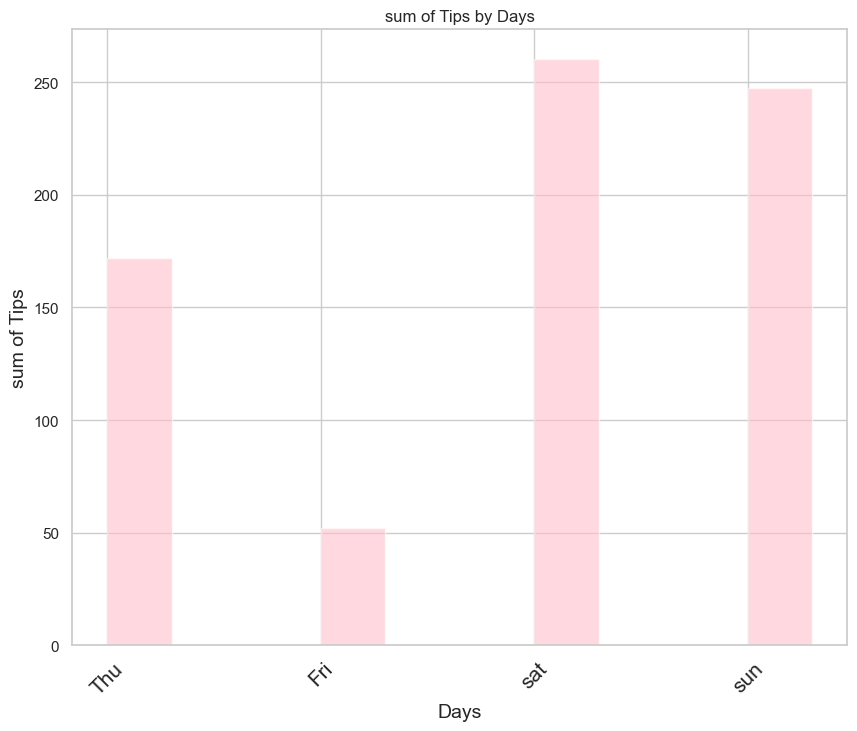

In [61]:
# Bar 차트 이해 및 제작 
#x축에는 X_label, y축에는 팁받은날 
#plt.bar(x_label, sum_tip_by_day)

#옵션 추가한경우 
plt.bar(x_label, sum_tip_by_day,
                      color='pink', # 차트 색 
                      alpha=0.6, # 차트 투명도 
                      width=0.3, # 너비 
                      align='edge') # 격자가 변경됨 (배치) 

plt.title('sum of Tips by Days') # 차트 제목 
plt.xlabel('Days', fontsize =14) #x축에 변수 넣기
plt.ylabel('sum of Tips', fontsize=14) # y축에 설명넣기 
plt.xticks(x_label_index, x_label, rotation=45, fontsize=15) # X축 변수 글자크기, 회전 등 
plt.show() 

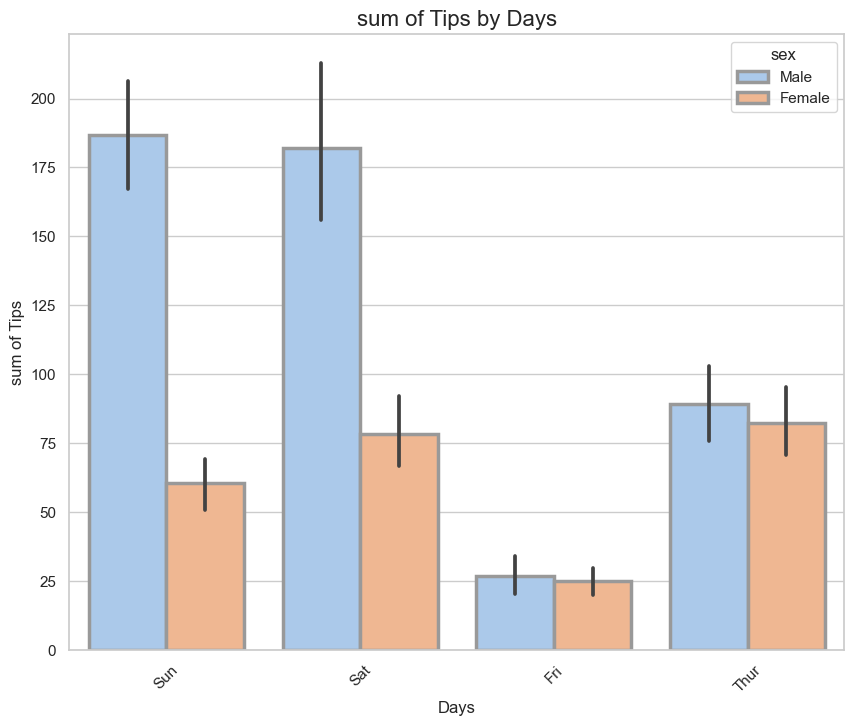

In [69]:
# seaborn을 활용한 시각화 
# sns.barplot(data=tips, # 데이터프레임 
            # x='day',
            # y='tip', 
           #  estimator= np.sum)

# 옵션 추가한 경우 
sns.barplot(data=tips, # 데이터프레임 
             x='day',
             y='tip', 
             estimator= np.sum, # 평균도 가능 
             hue ='sex', # 색깔 구분으로 특정 컬럼값을 비교하고 싶을 때 
             palette ='pastel', # 위에서 했으므로 굳이 안해도됨 
             order=['Sun', 'Sat','Fri', 'Thur'], # xticks 순서 
             edgecolor = '.6', # 바 모서리 선명도 
             linewidth=2.5)  # 라인에 대한 두께설정 

plt.title('sum of Tips by Days', fontsize=16) # 차트 제목 
plt.xlabel('Days') #x축에 변수 넣기
plt.ylabel('sum of Tips') # y축에 설명넣기 
plt.xticks(rotation=45) # X축 변수 글자크기, 회전 등 
plt.show() 

In [84]:
# pie 차트 이해 및 제작
# matplotlib를 활용한 시각화 
sum_tip_by_day =tips.groupby('day')['tip'].sum() 
ratio_tip_by_day = sum_tip_by_day/sum_tip_by_day.sum()

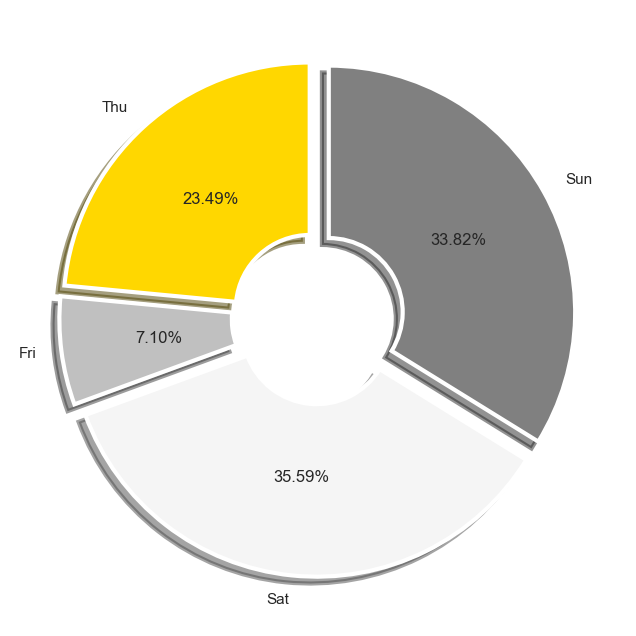

In [85]:
x_label = ['Thu', 'Fri','Sat', 'Sun'] # X_label이 목,금,토,일이 있음 

plt.pie(ratio_tip_by_day,  # 비율값
            labels=x_label,   # 라벨값
            autopct='%.2f%%',  # 부채꼴 안에 표시될 숫자 형식(소수 2자리깢 표시) 
            startangle=90, # 축이 시작되는 각도 설정 
            counterclock=True, # 시계 방향ㅁ -> False : 반시계 방향
            explode=[0.05, 0.05, 0.05, 0.05], # 중심에서 벗어나는 정도 표시
            shadow=True, # 그림자 표시 여부
            colors=['gold', 'silver', 'whitesmoke', 'gray'], # 색 변환
            wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':3})  # 도넛 차트 그릴 때 사용
plt.show() 

In [86]:
# Line 차트 이해 및 제작
# matplotlib을 활용해서 시각화

# line 차트 예제를 위해, tips 데이터에 가상 시간 컬럼 추가하기
# 일요일 데이터만 사용
sun_tips = tips[tips['day']=='Sun']
sun_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [90]:
# 현재 서버 시간을 얻기 위해 datetime 라이브러리 사용

import datetime
# datetime.date.today() -> 오늘 날짜
date =[]
today = datetime.date.today()
date.append(today)

for time in range(sun_tips.shape[0]-1):
    today += datetime.timedelta(1) # 하루씩 추가
    date.append(today)
date

[datetime.date(2023, 3, 7),
 datetime.date(2023, 3, 8),
 datetime.date(2023, 3, 9),
 datetime.date(2023, 3, 10),
 datetime.date(2023, 3, 11),
 datetime.date(2023, 3, 12),
 datetime.date(2023, 3, 13),
 datetime.date(2023, 3, 14),
 datetime.date(2023, 3, 15),
 datetime.date(2023, 3, 16),
 datetime.date(2023, 3, 17),
 datetime.date(2023, 3, 18),
 datetime.date(2023, 3, 19),
 datetime.date(2023, 3, 20),
 datetime.date(2023, 3, 21),
 datetime.date(2023, 3, 22),
 datetime.date(2023, 3, 23),
 datetime.date(2023, 3, 24),
 datetime.date(2023, 3, 25),
 datetime.date(2023, 3, 26),
 datetime.date(2023, 3, 27),
 datetime.date(2023, 3, 28),
 datetime.date(2023, 3, 29),
 datetime.date(2023, 3, 30),
 datetime.date(2023, 3, 31),
 datetime.date(2023, 4, 1),
 datetime.date(2023, 4, 2),
 datetime.date(2023, 4, 3),
 datetime.date(2023, 4, 4),
 datetime.date(2023, 4, 5),
 datetime.date(2023, 4, 6),
 datetime.date(2023, 4, 7),
 datetime.date(2023, 4, 8),
 datetime.date(2023, 4, 9),
 datetime.date(2023, 4, 10

In [91]:
sun_tips['date'] = date
sun_tips

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2023-03-07
1,10.34,1.66,Male,No,Sun,Dinner,3,2023-03-08
2,21.01,3.50,Male,No,Sun,Dinner,3,2023-03-09
3,23.68,3.31,Male,No,Sun,Dinner,2,2023-03-10
4,24.59,3.61,Female,No,Sun,Dinner,4,2023-03-11
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2023-05-17
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2023-05-18
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2023-05-19
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2023-05-20


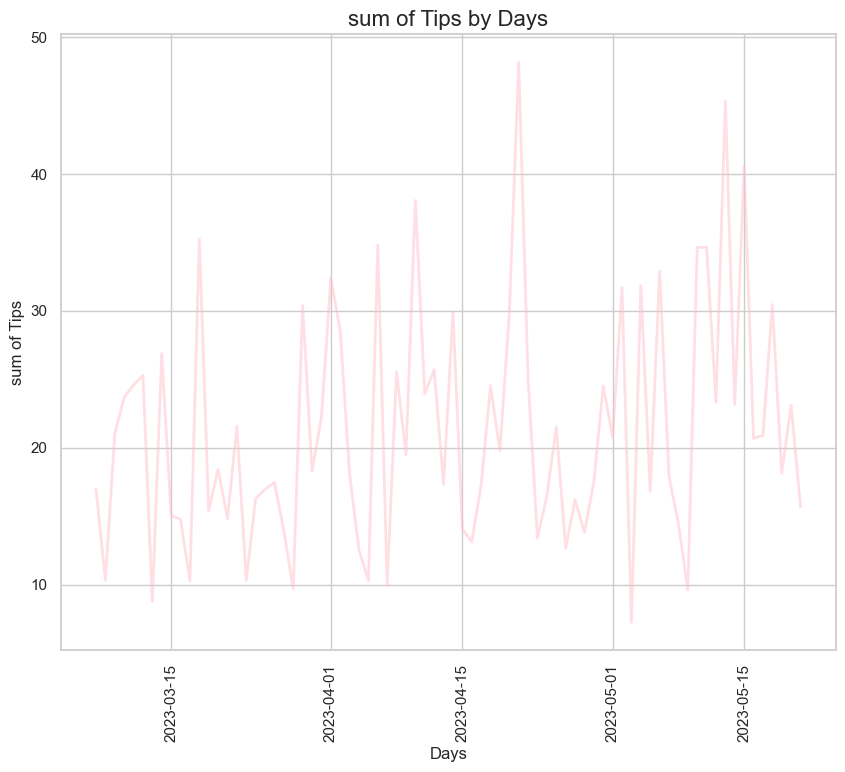

In [130]:
# line chart

plt.plot(sun_tips['date'], sun_tips['total_bill'],
        linestyle='-', # 선의 모양
        linewidth=2, # 너비
        color='pink', # 색
        alpha=0.5 ) # 투명도

plt.title('sum of Tips by Days', fontsize=16) # 차트 제목 
plt.xlabel('Days') #x축에 변수 넣기
plt.ylabel('sum of Tips') # y축에 설명넣기 
plt.xticks(rotation=90) # X축 변수 글자크기, 회전 등 

plt.show()

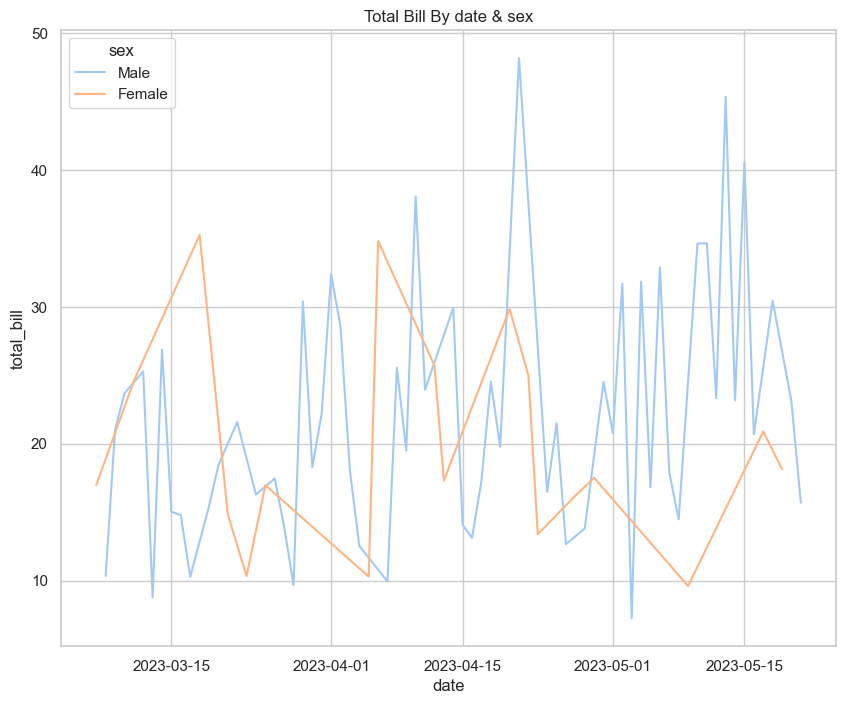

In [106]:
# seaborn을 활용한 시각화
sns.lineplot(data=sun_tips,
             x='date',
             y='total_bill',
             hue='sex')

plt.title('Total Bill By date & sex')
plt.show()

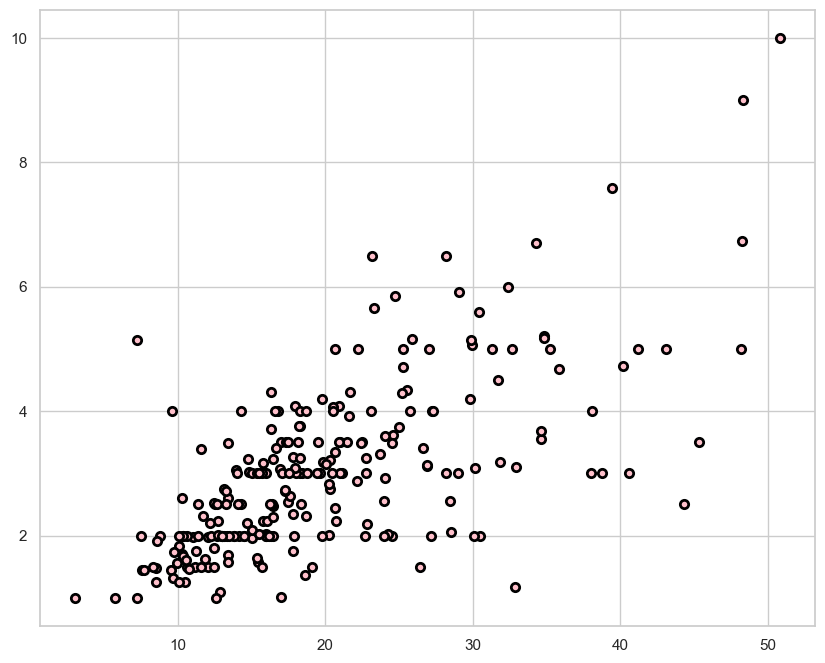

In [110]:
# Scatter 차트 이해 및 제작
# 변수 간의 상관 관게를 볼 때 많이 사용
# matplotlib을 활용한 시각화

plt.scatter(tips['total_bill'], tips['tip'],
            color='pink', # 색상
            edgecolors='black', # 테두리 색깔
            linewidths=2) # 라인 두께
plt.show()

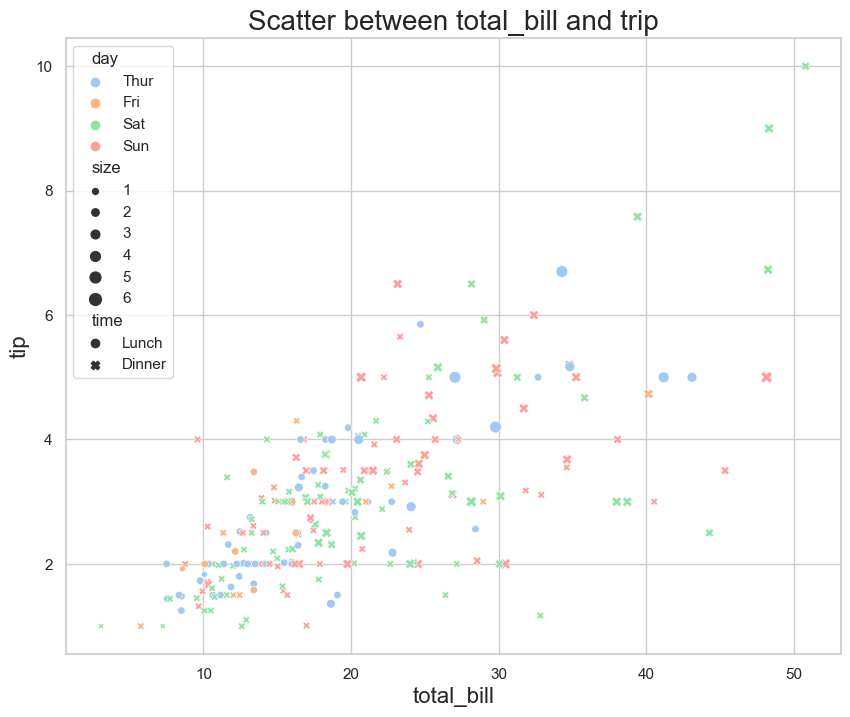

In [115]:
# seaborn을 활용한 시각화
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                style='time', # 모양 구분으로 다른 변수랑 비교
                hue='day', # 색깔 구분으로 다른 변수랑 비교
                size='size', # 크기 구분으로 다른 변수랑 비교
                )
plt.title('Scatter between total_bill and trip', fontsize=20)
plt.xlabel('total_bill', fontsize=16) #x축에 변수 넣기
plt.ylabel('tip', fontsize=16) # y축에 설명넣기 
plt.show()

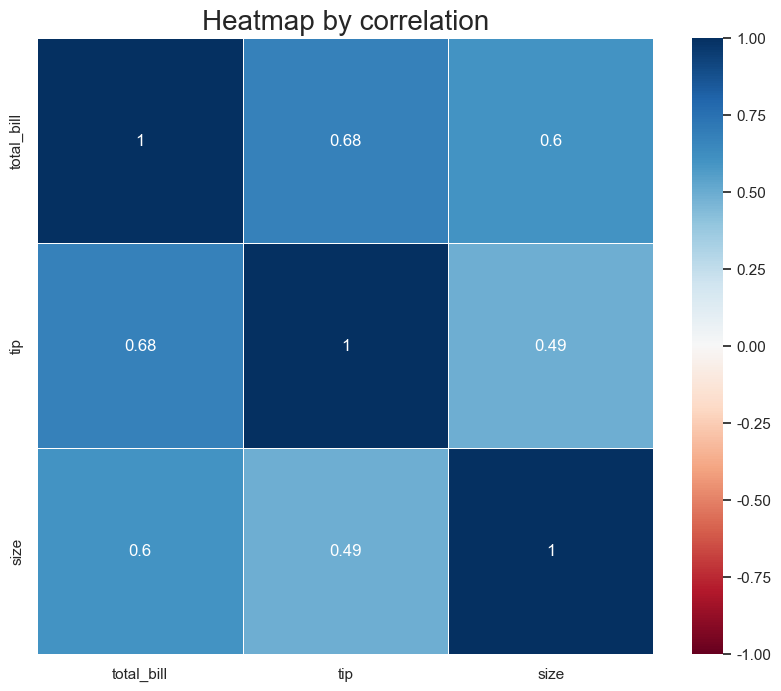

In [131]:
# Heat Map 차트 이해 및 제작
# seaborn을 활용한 시각화

sns.heatmap(tips.corr(),
            annot=True, # 박스 안 corr 값 표시 여부
            square=True, # 정사각형으로 만들지 여부
            vmin=-1, vmax=1, # 범위 지정은 1부터 -1로 지정(최소 최댓값 지정)
            linewidths=.5, # 라인 두께 지정
            cmap='RdBu') # 색상 선택

plt.title('Heatmap by correlation', fontsize=20)
plt.show()

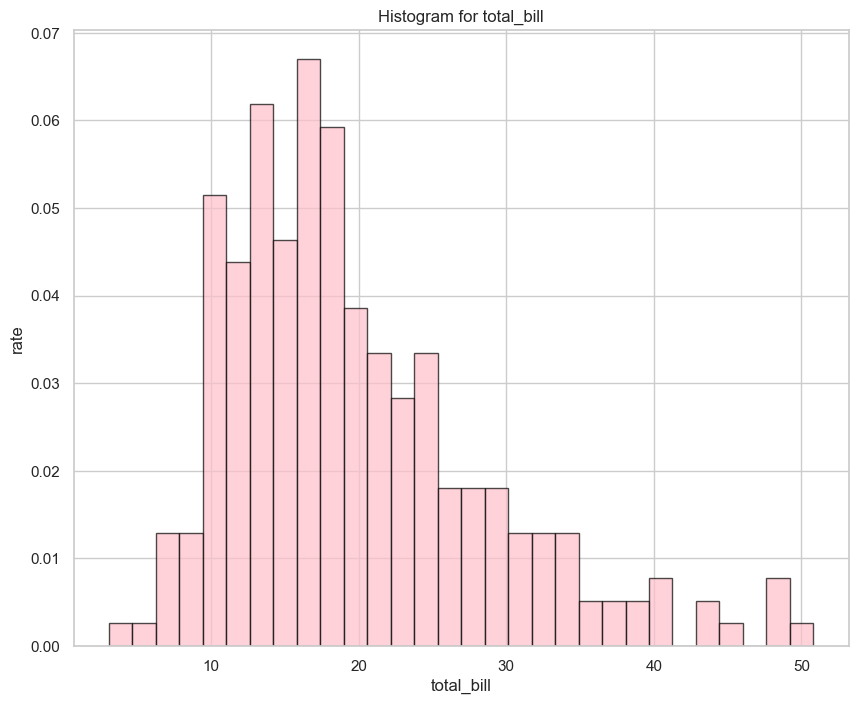

In [133]:
# Histogram 차트 이해 및 제작
# matplotlib을 활용한 시각화

plt.hist(tips['total_bill'],
         bins=30, # x축의 갯수
         density=True, # 비율적으로 보여주는 것
         alpha=0.7, # 선명도
         color='pink', # 색상
         edgecolor='black') # 테두리

plt.title('Histogram for total_bill') # 차트 제목 
plt.xlabel('total_bill') #x축에 변수 넣기
plt.ylabel('rate') # y축에 설명넣기 

plt.show()

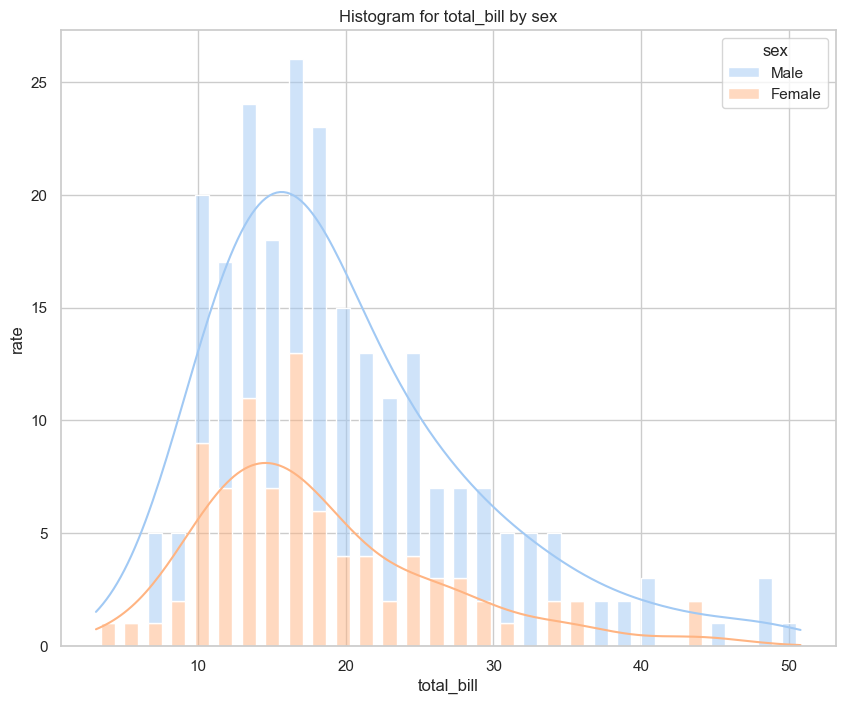

In [137]:
# seaborn을 활용한 시각화

sns.histplot(data=tips,
             x='total_bill',
             bins=30,
             kde=True, # 분포도를 선으로 보여줌
             hue='sex',
             multiple='stack',
             shrink=0.6) # bin의 두께

plt.title('Histogram for total_bill by sex') # 차트 제목 
plt.xlabel('total_bill') #x축에 변수 넣기
plt.ylabel('rate') # y축에 설명넣기 
plt.show()

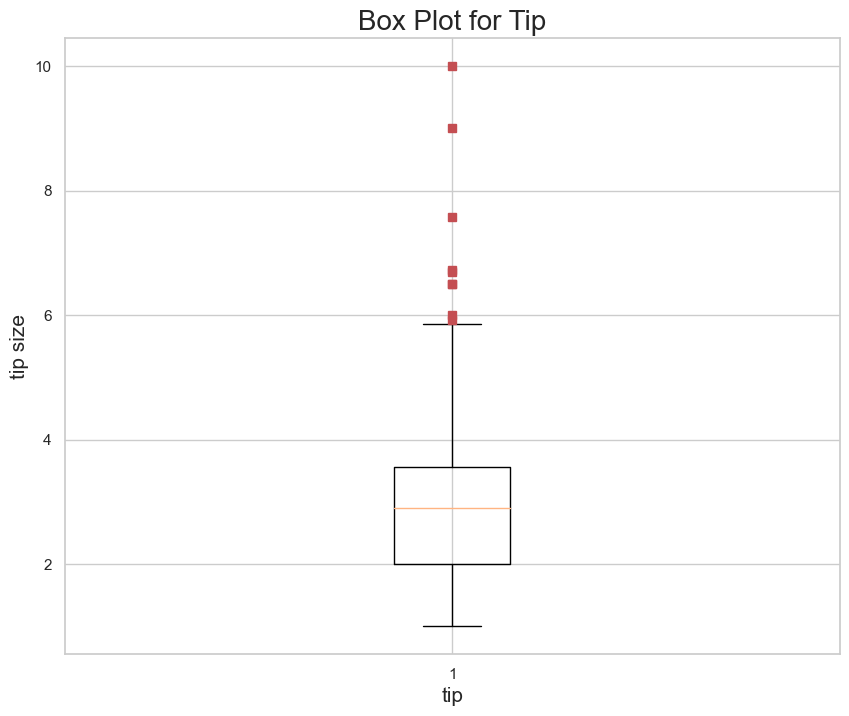

In [140]:
# Box 차트 이해 및 제작
# matplotlib을 활용한 시각화

plt.boxplot(tips['tip'],
            sym='rs', # 빨간색으로 표시
            )

plt.title('Box Plot for Tip', fontsize=20)
plt.xlabel('tip', fontsize=15)
plt.ylabel('tip size', fontsize=15)

plt.show()

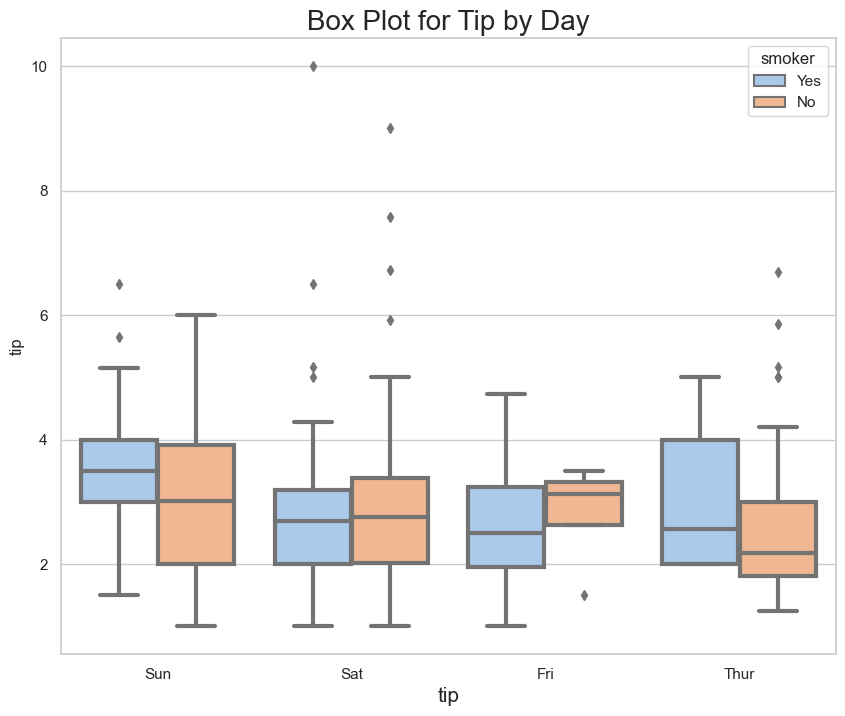

In [145]:
# seaborn을 활용한 시각화
sns.boxplot(data=tips,
            x='day',
            y='tip',
            hue='smoker',
            linewidth=3,
            order=['Sun', 'Sat', 'Fri', 'Thur'])

plt.title('Box Plot for Tip by Day', fontsize=20)
plt.xlabel('tip', fontsize=15)

plt.show()